In [11]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, main

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

# director_fees and loan_advances
features_list = ['poi','salary', 'bonus', 'long_term_incentive', 'deferred_income',
                 'deferral_payments', 'other', 'expenses',
                 'total_payments', 'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value',
                'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi','shared_receipt_with_poi'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    #data_dict.pop('TOTAL', 0)
    #data_dict.pop("THE TRAVEL AGENCY IN THE PARK", 0 )
    #data_dict.pop("LOCKHART EUGENE E", 0 )
    #data_dict.pop("BELFER ROBERT", 0 )
    #data_dict.pop("BHATNAGAR SANJAY", 0 )
    
### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
#features_train, features_test, labels_train, labels_test = \
   #train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

In [19]:
nb = GaussianNB()
skb = SelectKBest(f_classif)
dtc = DecisionTreeClassifier()

pipeline = Pipeline(steps=[("SKB", skb), ("NB", nb)])

params = {'SKB__k':range(2,18)}

split = StratifiedShuffleSplit(labels, test_size=0.3, random_state=42)

gs = GridSearchCV(pipeline, params, n_jobs=-1, cv = split, scoring = 'f1')
    
gs.fit(features,labels)
clf=gs.best_estimator_
print clf
pred = clf.predict(features_test)

print accuracy_score(pred,labels_test)
print precision_score(pred,labels_test)
print recall_score(pred,labels_test)
print f1_score(pred,labels_test)

dump_classifier_and_data(clf, my_dataset, features_list)
main()

Pipeline(steps=[('SKB', SelectKBest(k=13, score_func=<function f_classif at 0x000000000762F128>)), ('NB', GaussianNB(priors=None))])
0.883720930233
0.5
0.4
0.444444444444
Pipeline(steps=[('SKB', SelectKBest(k=13, score_func=<function f_classif at 0x000000000762F128>)), ('NB', GaussianNB(priors=None))])
	Accuracy: 0.83733	Precision: 0.38030	Recall: 0.34950	F1: 0.36425	F2: 0.35526
	Total predictions: 15000	True positives:  699	False positives: 1139	False negatives: 1301	True negatives: 11861



In [12]:
import pandas as pd
dataDF = pd.DataFrame.from_dict(data_dict, orient = 'index' ,
                  dtype = float)

In [13]:
print "Total Data Points: ", len(dataDF)
print "Total POIs: ", sum(dataDF['poi'])
print "# of Columns: ", len(dataDF.columns)
print dataDF.isnull().sum()

Total Data Points:  146
Total POIs:  18.0
# of Columns:  21
salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       60
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                  0
from_poi_to_this_person       60
dtype: int64


In [14]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
from biokit.viz import corrplot
import matplotlib as plt

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jeffrey\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[]

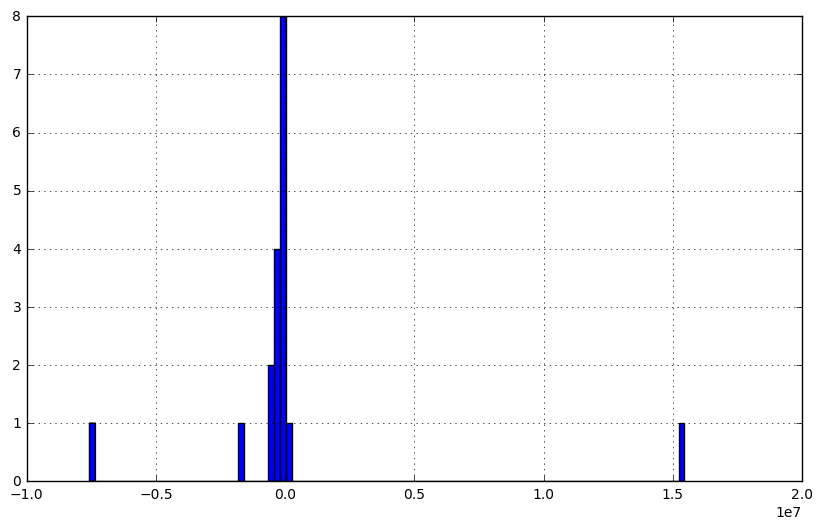

In [25]:
plot = dataDF['restricted_stock_deferred'].hist(bins = 100)
plot.plot()

In [18]:
c = corrplot.Corrplot(dataDF)

Computing correlation


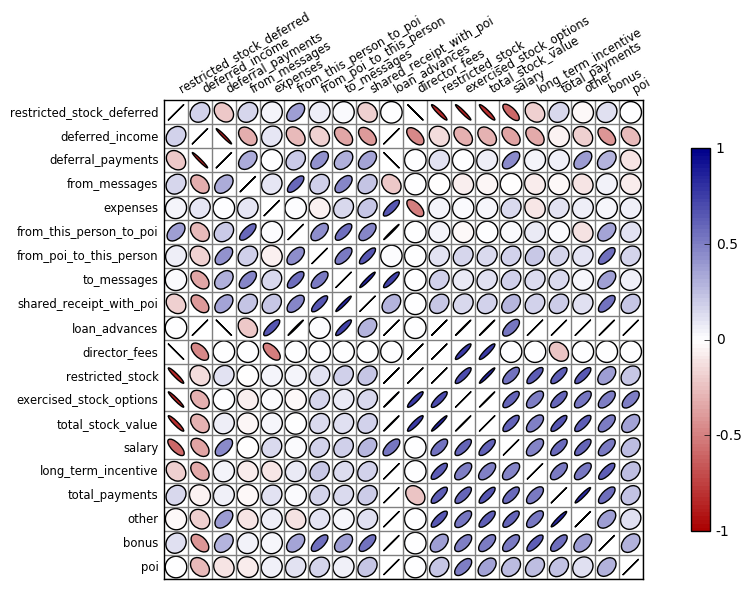

In [19]:
c.plot()
#loan advances and from this person to poi
#bonus and from this person to poi

In [24]:
print dataDF['from_this_person_to_poi']/dataDF['bonus']


ALLEN PHILLIP K                0.000016
BADUM JAMES P                       NaN
BANNANTINE JAMES M                  NaN
BAXTER JOHN C                       NaN
BAY FRANKLIN R                      NaN
BAZELIDES PHILIP J                  NaN
BECK SALLY W                   0.000551
BELDEN TIMOTHY N               0.000021
BERBERIAN DAVID                     NaN
BERGSIEKER RICHARD P           0.000000
BIBI PHILIPPE A                0.000008
BLACHMAN JEREMY M              0.000002
BLAKE JR. NORMAN P                  NaN
BOWEN JR RAYMOND M             0.000011
BROWN MICHAEL                       NaN
BUCHANAN HAROLD G              0.000000
BUTTS ROBERT H                      NaN
BUY RICHARD B                  0.000079
CALGER CHRISTOPHER F           0.000020
CARTER REBECCA C               0.000023
CAUSEY RICHARD A               0.000012
CHAN RONNIE                         NaN
CHRISTODOULOU DIOMEDES              NaN
CLINE KENNETH W                     NaN
COLWELL WESLEY                 0.000009
